In [1]:
import pandas as pd
import datetime as dt

df = pd.read_csv('online_retail_listing.csv', sep=";", encoding="cp1251")

/Users/oladik/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [42]:
df.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,"6,95",13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,"6,75",13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,"6,75",13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,"2,1",13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,"1,25",13085,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,"1,65",13085,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,"1,25",13085,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,"5,95",13085,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,"2,55",13085,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,"3,75",13085,United Kingdom


In [45]:
print(df['Description'].unique())

['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'GIN AND TONIC DIET METAL SIGN'
 'SET OF 6 RIBBONS PARTY' 'SILVER AND BLACK ORBIT NECKLACE']


In [3]:
df.describe()

,Quantity,Customer ID
count,1.048575e+06,811893.000000
mean,9.957525e+00,15324.712265
std,1.335187e+02,1697.033034
min,-7.421500e+04,12346.000000
25%,1.000000e+00,13971.000000
50%,3.000000e+00,15260.000000
75%,1.000000e+01,16795.000000
max,7.421500e+04,18287.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [5]:
print(df.shape)

(1048575, 8)


In [6]:
# Clean data
df.dropna(inplace=True)

In [7]:
print(df.shape)

(811893, 8)


In [8]:
pd.set_option('display.float_format', '{:.0f}'.format)
print(df['Customer ID'].value_counts())

Customer ID
17841    12780
14911    11328
12748     7100
14606     6608
15311     4664
         ...  
15316        1
16953        1
17546        1
14939        1
15929        1
Name: count, Length: 5924, dtype: int64


In [9]:
# Convert 'InvoiceDate' to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%d.%m.%Y %H:%M")

In [10]:
# Calculate Recency, Frequency, and Monetary values
today_date = df['InvoiceDate'].max() + dt.timedelta(days=2)
rfm_table = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,
    'Customer ID': lambda x: len(x),
    'Quantity': lambda x: x.sum()
})

In [11]:
# Rename columns
rfm_table.rename(columns={'InvoiceDate': 'recency',
                          'Customer ID': 'frequency',
                          'Quantity': 'monetary_value'}, inplace=True)

In [12]:
# Assign RFM scores using qcut
rfm_table['r_score'] = pd.qcut(rfm_table['recency'], 4, labels=range(4, 0, -1))
rfm_table['f_score'] = pd.qcut(rfm_table['frequency'], 4, labels=range(1, 5))
rfm_table['m_score'] = pd.qcut(rfm_table['monetary_value'], 4, labels=range(1, 5))

In [13]:
# Combine RFM scores
rfm_table['rfm_segment'] = rfm_table['r_score'].astype(str) + rfm_table['f_score'].astype(str) + rfm_table['m_score'].astype(str)
rfm_table['rfm_score'] = rfm_table[['r_score', 'f_score', 'm_score']].sum(axis=1)

print(rfm_table)

             recency  frequency  monetary_value r_score f_score m_score  \
Customer ID                                                               
12346            322         48              52       2       2       1   
12347             36        242            3094       3       4       4   
12348             72         51            2714       3       2       4   
12349             15        180            1619       4       4       4   
12350            306         17             197       2       1       2   
...              ...        ...             ...     ...     ...     ...   
18283              6        936            1591       4       4       4   
18284            426         29             493       1       2       3   
18285            657         12             145       1       1       1   
18286            473         70             592       1       3       3   
18287             39        156            3011       3       4       4   

            rfm_segment 

In [14]:
print(rfm_table.describe())

       recency  frequency  monetary_value  rfm_score
count     5924       5924            5924       5924
mean       204        137            1702          7
std        210        353            8448          3
min          2          1           -1085          3
25%         26         20             179          5
50%        103         53             468          7
75%        378        143            1313         10
max        735      12780          357262         12


In [15]:
rfm_table.head(n=25).sort_values(by='rfm_score', ascending=False)

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_segment,rfm_score
Customer ID,,,,,,,,
12349,15,180,1619,4,4,4,444,12
12362,7,245,1992,4,4,4,444,12
12359,4,375,2526,4,4,4,444,12
12371,41,167,1436,3,4,4,344,11
12347,36,242,3094,3,4,4,344,11
12370,47,202,2605,3,4,4,344,11
12364,4,85,1506,4,3,4,434,11
12360,48,218,2458,3,4,4,344,11
12356,19,143,3417,4,3,4,434,11


In [16]:
# rfm_table['recency'] = rfm_table['recency'].astype(np.float32)
# rfm_table['frequency'] = rfm_table['frequency'].astype(np.float32)
# rfm_table['monetary_value'] = rfm_table['monetary_value'].astype(np.float32)

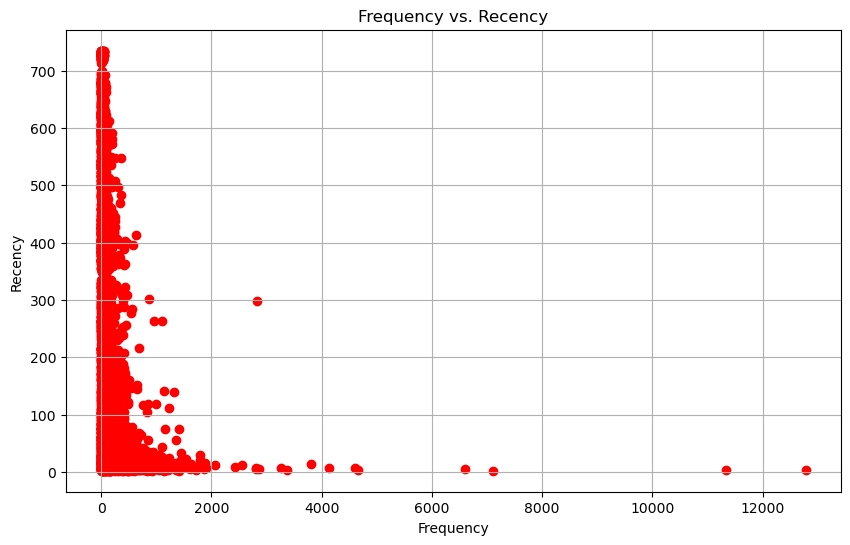

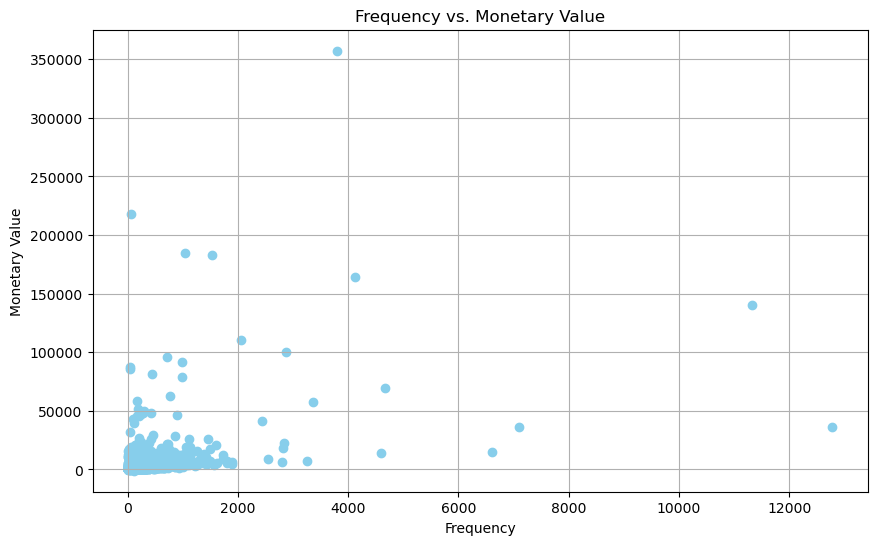

/Users/oladik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


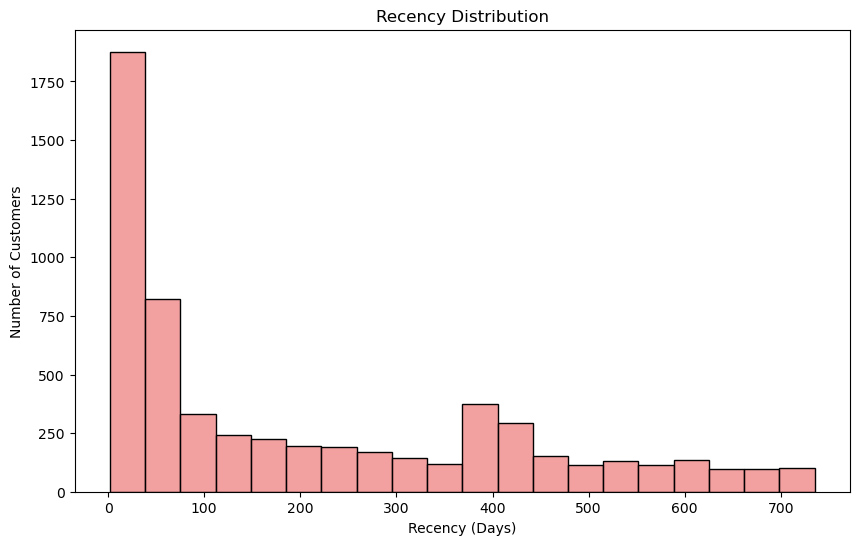

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Create a heatmap for the RFM segments
# plt.figure(figsize=(10, 8))
# sns.heatmap(rfm_table, annot=True, fmt=".0f", cmap="YlGnBu")
# plt.title("RFM Segments")
# plt.xlabel("Frequency")
# plt.ylabel("Recency")
# plt.show()

# Create a scatter plot of Frequency vs. recency
plt.figure(figsize=(10, 6))
plt.scatter(rfm_table["frequency"], rfm_table["recency"], color="red")
plt.title("Frequency vs. Recency")
plt.xlabel("Frequency")
plt.ylabel("Recency")
plt.grid(True)
plt.show()

# Create a scatter plot of Frequency vs. Monetary value
plt.figure(figsize=(10, 6))
plt.scatter(rfm_table["frequency"], rfm_table["monetary_value"], color="skyblue")
plt.title("Frequency vs. Monetary Value")
plt.xlabel("Frequency")
plt.ylabel("Monetary Value")
plt.grid(True)
plt.show()

# Create a bar chart of Recency distribution
plt.figure(figsize=(10, 6))
sns.histplot(rfm_table["recency"], bins=20, color="lightcoral")
plt.title("Recency Distribution")
plt.xlabel("Recency (Days)")
plt.ylabel("Number of Customers")
plt.show()

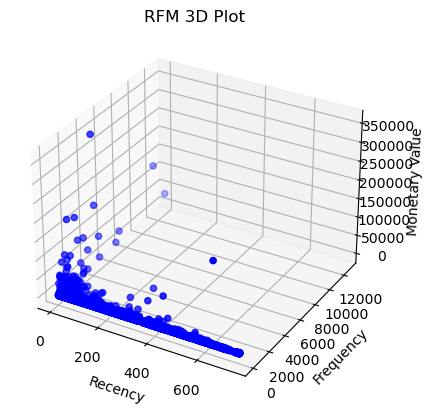

In [18]:
fig = plt.figure()
ax = plt.axes(projection="3d")

x = rfm_table["recency"]
y = rfm_table["frequency"]
z = rfm_table["monetary_value"]

ax.scatter3D(rfm_table['recency'], rfm_table['frequency'], rfm_table['monetary_value'], c='blue', marker='o')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('RFM 3D Plot')

plt.show()

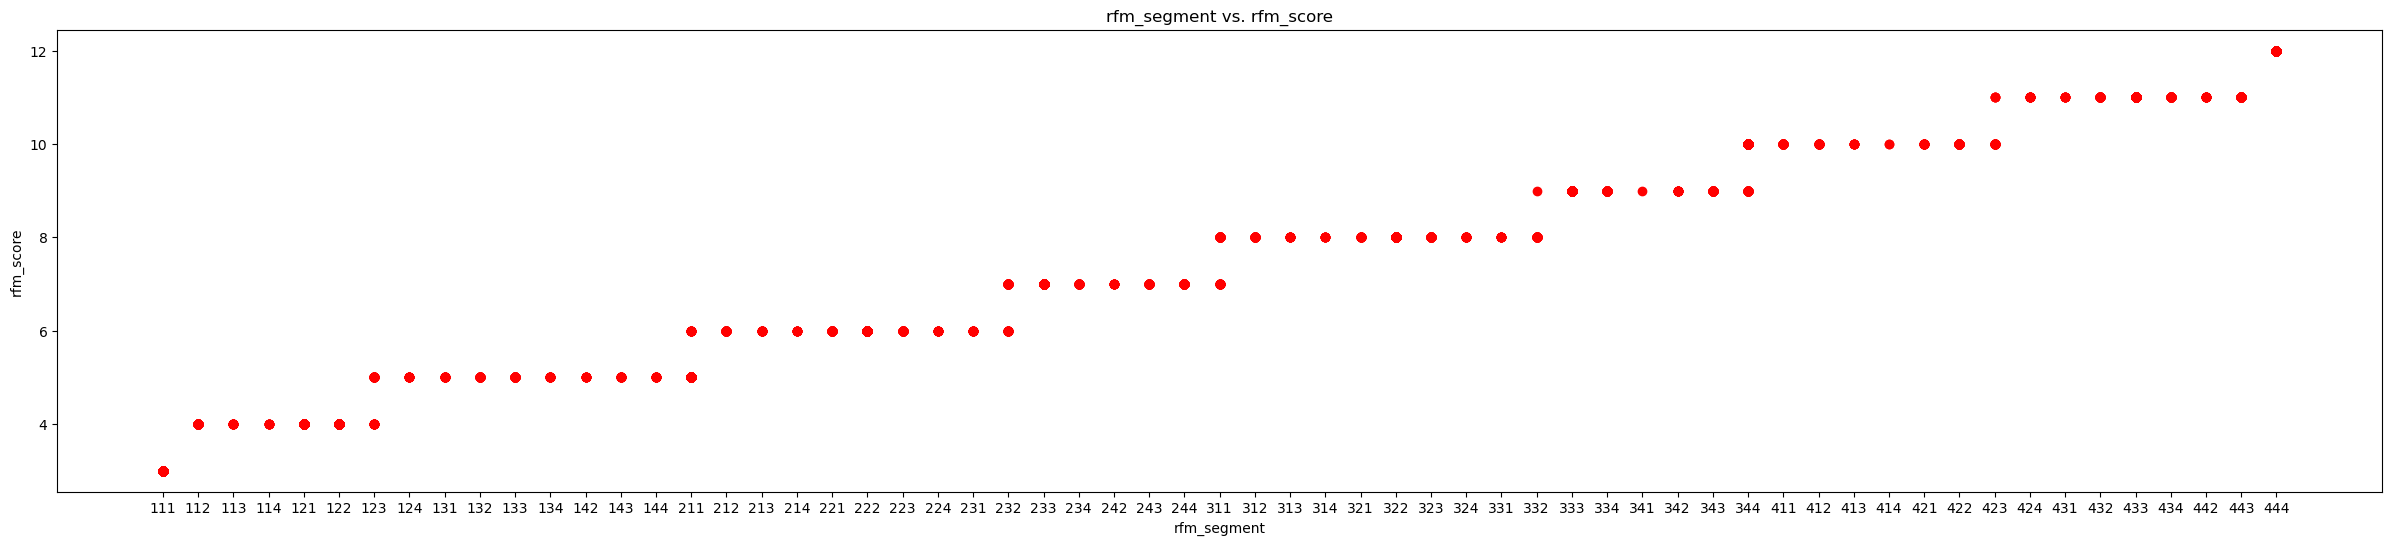

In [19]:
plt.figure(figsize=(30, 6))
plt.scatter(rfm_table["rfm_segment"].sort_values(), rfm_table["rfm_score"].sort_values(), color="red")
plt.title("rfm_segment vs. rfm_score")
plt.xlabel("rfm_segment")
plt.ylabel("rfm_score")
plt.grid(False)
plt.show()

In [20]:
rfm_table.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_segment,rfm_score
Customer ID,,,,,,,,
12346,322,48,52,2,2,1,221,5
12347,36,242,3094,3,4,4,344,11
12348,72,51,2714,3,2,4,324,9
12349,15,180,1619,4,4,4,444,12
12350,306,17,197,2,1,2,212,5


In [23]:
rfm_table['rfm_segment'] = rfm_table['rfm_segment'].astype(int)
rfm_table['r_score'] = rfm_table['r_score'].astype(int)
rfm_table['f_score'] = rfm_table['f_score'].astype(int)
rfm_table['m_score'] = rfm_table['m_score'].astype(int)

In [24]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5924 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   recency         5924 non-null   int64
 1   frequency       5924 non-null   int64
 2   monetary_value  5924 non-null   int64
 3   r_score         5924 non-null   int64
 4   f_score         5924 non-null   int64
 5   m_score         5924 non-null   int64
 6   rfm_segment     5924 non-null   int64
 7   rfm_score       5924 non-null   int64
dtypes: int64(8)
memory usage: 416.5 KB


In [25]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5924 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   recency         5924 non-null   int64
 1   frequency       5924 non-null   int64
 2   monetary_value  5924 non-null   int64
 3   r_score         5924 non-null   int64
 4   f_score         5924 non-null   int64
 5   m_score         5924 non-null   int64
 6   rfm_segment     5924 non-null   int64
 7   rfm_score       5924 non-null   int64
dtypes: int64(8)
memory usage: 416.5 KB


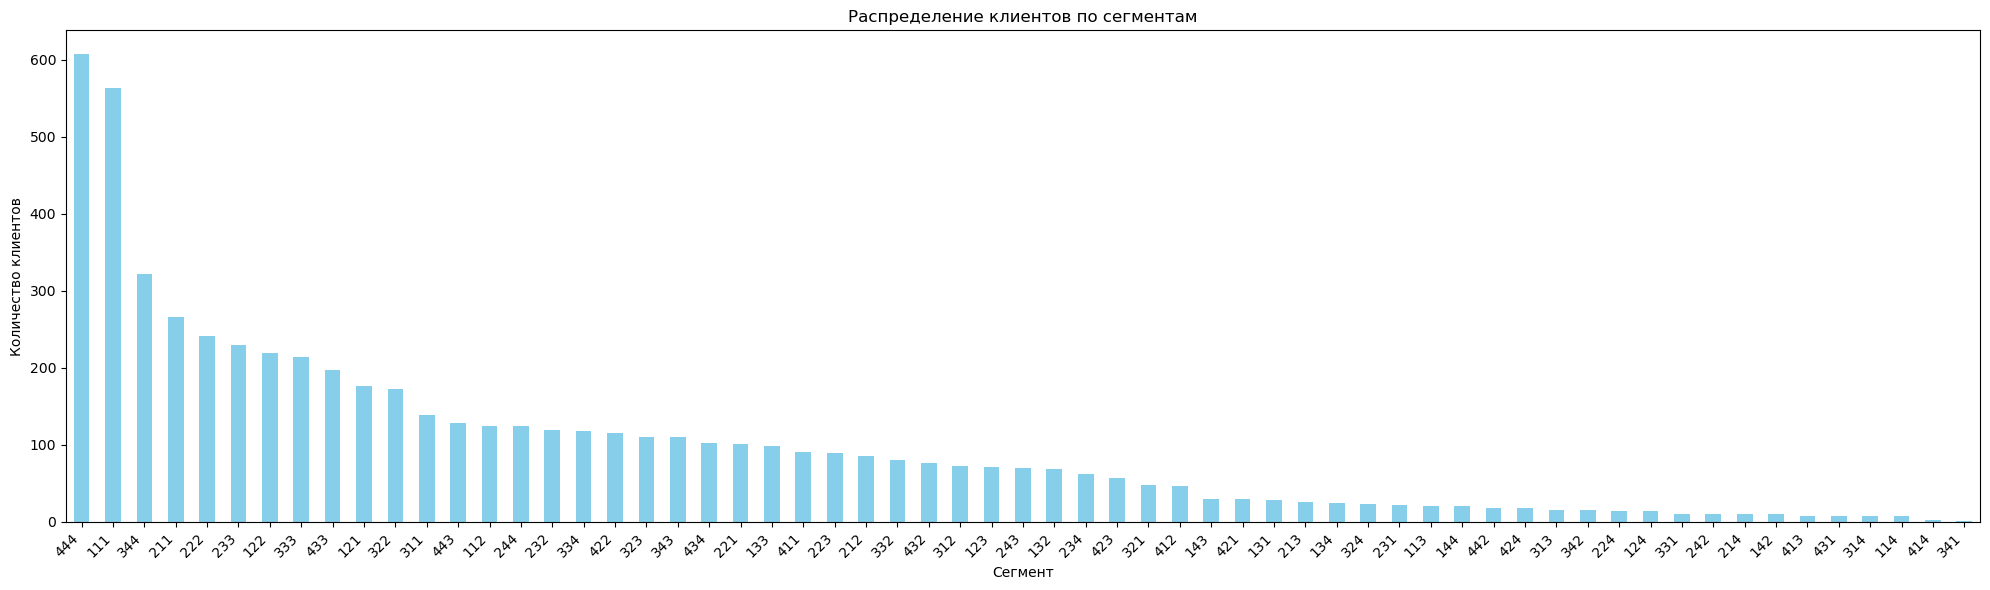

In [28]:
value_counts = rfm_table['rfm_segment'].value_counts()

plt.figure(figsize=(20, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение клиентов по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

У нас получилась весьма  интересная ситуация, большинство клиентов у нас имеют четверки по всем скорам: а на стором месте 1 по всем скорам количество этих клиентов примерно одинаково. на третьем месте большай группа с выскоими балами но с троукой по ресенси. 

Определим следующий группы лояльных клиентов исхордя из нашей субъективной оценки

In [31]:
def segment_customer(row):
    r, f, m = row['r_score'], row['f_score'], row['m_score']
    
    if r >= 3 and f >= 3 and m >= 3:
        return 'Лояльные клиенты'
    elif r >= 3 and f >= 2 and m >= 2:
        return 'Потенциальные лояльные клиенты'
    elif m == 4:
        return 'Клиенты с высоким доходом'
    elif r == 4 and f <= 2 and m <= 2:
        return 'Новые клиенты'
    elif f >= 3 and r <= 2:
        return 'Клиенты, которых нужно вернуть'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Потерянные клиенты'
    else:
        return 'Другие'


In [33]:
rfm_table['client_type'] = rfm_table.apply(segment_customer, axis=1)

In [34]:
rfm_table.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_segment,rfm_score,client_type
Customer ID,,,,,,,,,
12346,322,48,52,2,2,1,221,5,Потерянные клиенты
12347,36,242,3094,3,4,4,344,11,Лояльные клиенты
12348,72,51,2714,3,2,4,324,9,Потенциальные лояльные клиенты
12349,15,180,1619,4,4,4,444,12,Лояльные клиенты
12350,306,17,197,2,1,2,212,5,Потерянные клиенты


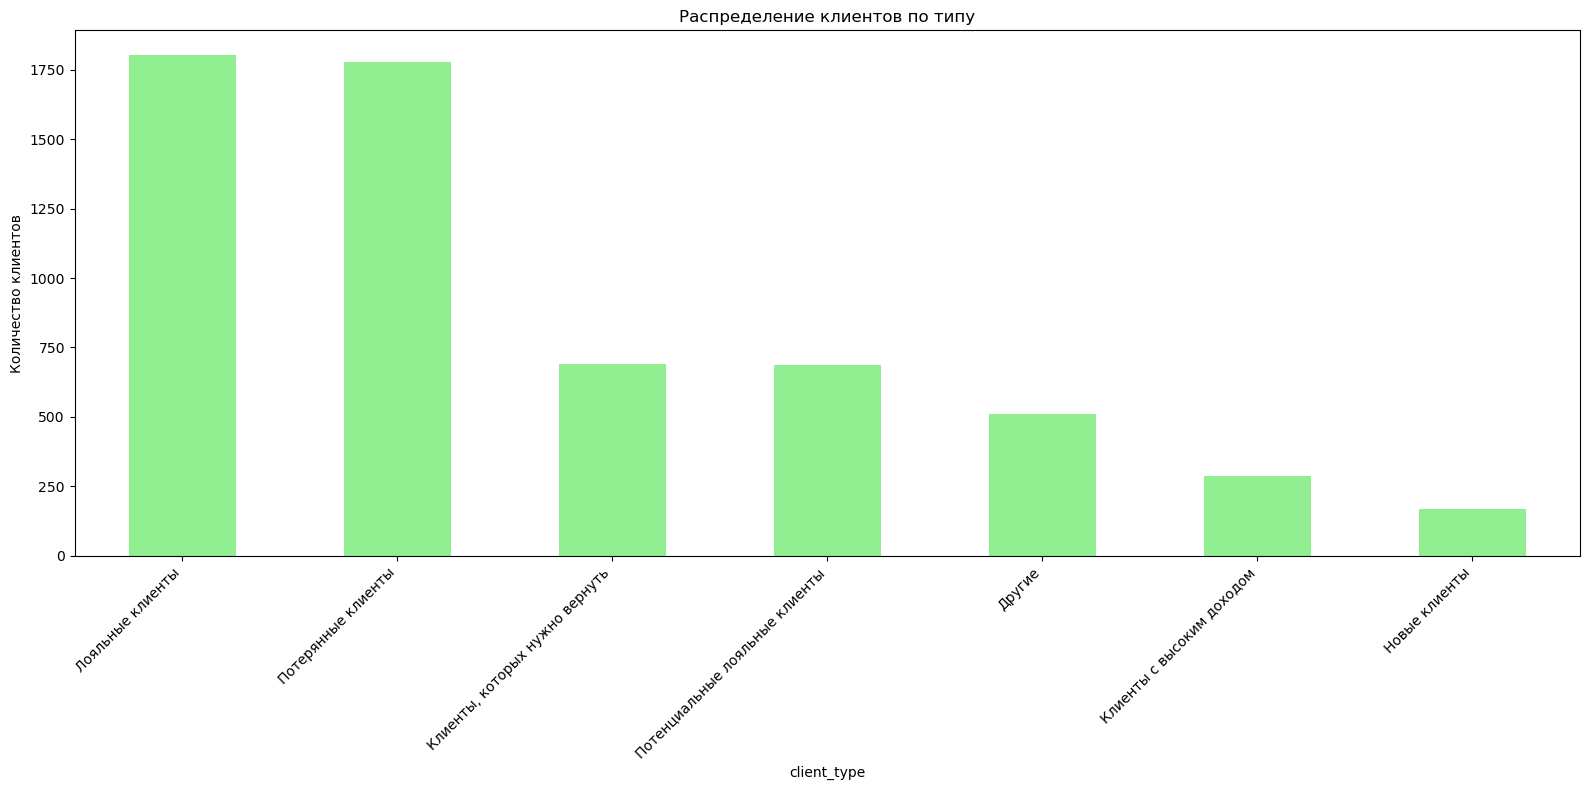

In [40]:
value_counts1 = rfm_table['client_type'].value_counts()

plt.figure(figsize=(16, 8))
value_counts1.plot(kind='bar', color='lightgreen')
plt.title('Распределение клиентов по типу')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [48]:
rfm_ployal = rfm_table.query('client_type == "Потенциальные лояльные клиенты"')

Выберем две группы клиентов: потенциально лояльныя и те, которых нужно вернуть, потому что это потенциально значительно повысит количество наших клиентов 

Стратегия для потенциаллно лояльных клиентов: 

1. Баллы за покупки: За каждую покупку клиенту начисляются баллы, которыми он потом может оплатить часть следующей покупки, баллы действуют определенный период, клинету юудут направляться напоминания, что быллы сгорят, если он их не использует. 
2. Бесплатная доставка товаров начиная от суммы среднего чека данной группы                   
3. Подарки за покупки на сумму превыщаюзщую средний чек на 25 процентов для данного сегмента. 
4. Персонализированные рассылки с подборкой товаров на основе истории покупок клиента каждый две недели, чтобы сильно не надоесть клиенту.
5. Закрытые распродажи для клиентов, зарегситрировавшихся в программе лояльности. ранний доступ к расподажам

Стратегия для клиентов, которых нужно вернуть:

1. Персонализированные скидки, например направление клиенту купона со скидкой 15 процентов на любой товар с ограниченным сроком действия. 

2. Подарочные сертификаты с денежным эквивалентом на следующую покупку.  

3. Купон на бесплатную доставку при любой покупке от 15 долларов 

4. Персонализированные приглашения на закрытыте распродажи

5. СПредложение скидок или бонусов при покупке у партнеров.

Стратегия для потенциально лояльных клиентов:

Баллы за покупки:
Контрольная группа: Клиенты, которые не получают баллы.
Тестовая группа: Клиенты, получающие баллы за покупки.
Метрики: Увеличение среднего чека, частота покупок.

Бесплатная доставка:

Контрольная группа: Клиенты без предложения бесплатной доставки.
Тестовая группа: Клиенты, получающие бесплатную доставку от суммы среднего чека.
Метрики: Средний чек, количество покупок, количество заказов с бесплатной доставкой.
Подарки за покупки:

Контрольная группа: Клиенты без предложений подарков.
Тестовая группа: Клиенты, получающие подарки за покупки на 25% выше среднего чека.
Метрики: Увеличение среднего чека, частота покупок, количество подарков.
Персонализированные рассылки:

Контрольная группа: Клиенты без персонализированных рассылок.
Тестовая группа: Клиенты, получающие рассылки каждые две недели.
Метрики: Открываемость писем, клики по ссылкам, конверсия в покупки.
Закрытые распродажи:

Контрольная группа: Клиенты без доступа к закрытым распродажам.
Тестовая группа: Клиенты с ранним доступом к распродажам.
Метрики: Участие в распродажах, средний чек, частота покупок.
Стратегия для клиентов, которых нужно вернуть:

Персонализированные скидки:

Контрольная группа: Клиенты без скидок.
Тестовая группа: Клиенты, получающие купон на 15% скидку.
Метрики: Возврат клиентов, частота покупок, конверсия купонов.
Подарочные сертификаты:

Контрольная группа: Клиенты без сертификатов.
Тестовая группа: Клиенты, получающие подарочные сертификаты.
Метрики: Возврат клиентов, средний чек, использование сертификатов.
Купон на бесплатную доставку:

Контрольная группа: Клиенты без купонов на доставку.
Тестовая группа: Клиенты, получающие купон на бесплатную доставку.
Метрики: Частота покупок, средний чек, использование купонов.
Персонализированные приглашения:

Контрольная группа: Клиенты без приглашений.
Тестовая группа: Клиенты, получающие персонализированные приглашения.
Метрики: Участие в распродажах, возврат клиентов, средний чек.
Скидки у партнеров:

Контрольная группа: Клиенты без предложений от партнеров.
Тестовая группа: Клиенты, получающие скидки у партнеров.
Метрики: Возврат клиентов, частота покупок, использование предложений.
Эти тесты помогут определить эффективность каждой стратегии и её влияние на поведение клиентов.
